# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Align text to the left
def left_align(df):
    left_aligned_df = df.style.set_properties(**{'text-align': 'left'}).set_table_styles(
        [ dict(selector='th', props=[('text-align', 'left')] ) ])
    
    return left_aligned_df

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
# len(cities)
cities

['victoria',
 'rikitea',
 'hilo',
 'tsihombe',
 'mataura',
 'bredasdorp',
 'hobart',
 'conceicao do araguaia',
 'catio',
 'barbar',
 'puerto ayora',
 'faya',
 'geraldton',
 'catamarca',
 'pevek',
 'kapaa',
 'foggia',
 'hami',
 'labuan',
 'cidreira',
 'kavaratti',
 'bilibino',
 'port alfred',
 'maceio',
 'butaritari',
 'naze',
 'busselton',
 'coihaique',
 'qaanaaq',
 'palabuhanratu',
 'vaini',
 'verkhnevilyuysk',
 'esperance',
 'grindavik',
 'atuona',
 'kavieng',
 'jati',
 'avarua',
 'olimpia',
 'cape town',
 'cap-aux-meules',
 'tongren',
 'bethel',
 'dubrovka',
 'sao filipe',
 'lokosovo',
 'mgandu',
 'chodavaram',
 'airai',
 'albany',
 'hermanus',
 'sedro-woolley',
 'kanniyakumari',
 'bluff',
 'chokurdakh',
 'port hardy',
 'nome',
 'codrington',
 'arawa',
 'jamestown',
 'amderma',
 'aksha',
 'longyearbyen',
 'neiafu',
 'taolanaro',
 'azrow',
 'bathsheba',
 'east london',
 'tongchuan',
 'cabo san lucas',
 'egvekinot',
 'ribeira grande',
 'mar del plata',
 'el retorno',
 'clyde river',
 

### Perform API Calls

In [4]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
temp_unit = 'imperial'
citynumb = 1
setnumb = 1
city_n = []
lat = []
lng = []
max_temp = []
humidity = []
cloud = []
wind_speed = []
country = []
date_w = []

for city in cities:
    url_query = (f"{url}appid={weather_api_key}&q={city}&units={temp_unit}")
    weather_response = requests.get(url_query)
    weather_json = weather_response.json()
    
    try:
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloud.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date_w.append(weather_json['dt'])
        city_n.append(city)
        print(f"Processing Record {citynumb} of Set {setnumb} | {city}")
        citynumb += 1
        
        if citynumb == 50:
            setnumb += 1 
            citynumb = 1
    except:
        print('City' + '\033[1m' + ' not ' + '\033[0m' + 'found. Skipping...')

Processing Record 1 of Set 1 | victoria
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | hilo
City not found. Skipping...
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | conceicao do araguaia
Processing Record 8 of Set 1 | catio
City not found. Skipping...
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | faya
Processing Record 11 of Set 1 | geraldton
Processing Record 12 of Set 1 | catamarca
Processing Record 13 of Set 1 | pevek
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | foggia
Processing Record 16 of Set 1 | hami
Processing Record 17 of Set 1 | labuan
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | kavaratti
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | maceio
Processing Record 23 of Set 1 | butaritari
Processing Rec

Processing Record 41 of Set 4 | severo-kurilsk
Processing Record 42 of Set 4 | hastings
Processing Record 43 of Set 4 | yar-sale
Processing Record 44 of Set 4 | carlton
Processing Record 45 of Set 4 | haines junction
Processing Record 46 of Set 4 | cherskiy
Processing Record 47 of Set 4 | westport
Processing Record 48 of Set 4 | piacabucu
Processing Record 49 of Set 4 | half moon bay
Processing Record 1 of Set 5 | simdega
Processing Record 2 of Set 5 | upernavik
Processing Record 3 of Set 5 | cabedelo
Processing Record 4 of Set 5 | mount gambier
Processing Record 5 of Set 5 | wanning
Processing Record 6 of Set 5 | khipro
Processing Record 7 of Set 5 | pak phanang
Processing Record 8 of Set 5 | kodiak
Processing Record 9 of Set 5 | antropovo
Processing Record 10 of Set 5 | gaziantep
Processing Record 11 of Set 5 | buraydah
Processing Record 12 of Set 5 | agadir
Processing Record 13 of Set 5 | luganville
Processing Record 14 of Set 5 | juba
Processing Record 15 of Set 5 | wanaka
Processi

Processing Record 34 of Set 8 | suluq
Processing Record 35 of Set 8 | klaksvik
Processing Record 36 of Set 8 | paamiut
Processing Record 37 of Set 8 | rognan
Processing Record 38 of Set 8 | touros
Processing Record 39 of Set 8 | kota bahru
Processing Record 40 of Set 8 | pinhao
Processing Record 41 of Set 8 | beroroha
Processing Record 42 of Set 8 | kaoma
Processing Record 43 of Set 8 | senneterre
City not found. Skipping...
Processing Record 44 of Set 8 | fez
Processing Record 45 of Set 8 | merauke
Processing Record 46 of Set 8 | ancud
City not found. Skipping...
Processing Record 47 of Set 8 | cururupu
Processing Record 48 of Set 8 | minab
Processing Record 49 of Set 8 | falciu
Processing Record 1 of Set 9 | lat yao
City not found. Skipping...
Processing Record 2 of Set 9 | pangody
Processing Record 3 of Set 9 | paranapanema
Processing Record 4 of Set 9 | la ronge
Processing Record 5 of Set 9 | kimbe
Processing Record 6 of Set 9 | agnibilekrou
Processing Record 7 of Set 9 | dotnuva
P

Processing Record 22 of Set 12 | marsa matruh
Processing Record 23 of Set 12 | puerto escondido
Processing Record 24 of Set 12 | chuy
Processing Record 25 of Set 12 | yaan
Processing Record 26 of Set 12 | christchurch
Processing Record 27 of Set 12 | methoni
Processing Record 28 of Set 12 | agustin codazzi
Processing Record 29 of Set 12 | tongliao
Processing Record 30 of Set 12 | port macquarie
Processing Record 31 of Set 12 | katete
Processing Record 32 of Set 12 | haimen
Processing Record 33 of Set 12 | gao
Processing Record 34 of Set 12 | prijepolje
Processing Record 35 of Set 12 | port-cartier
Processing Record 36 of Set 12 | yining
Processing Record 37 of Set 12 | saint-joseph
Processing Record 38 of Set 12 | esil
Processing Record 39 of Set 12 | san jose
Processing Record 40 of Set 12 | waingapu
Processing Record 41 of Set 12 | ilorin
Processing Record 42 of Set 12 | santa rosa del sur
Processing Record 43 of Set 12 | shiyan
Processing Record 44 of Set 12 | shaunavon
Processing R

### Convert Raw Data to DataFrame

In [5]:
# Create DataFrame with extracted data.
cities_df = pd.DataFrame({'City':city_n, 'Latitude':lat, 'Longitude':lng, 'Max Temp (F)':max_temp, 'Humidity (%)':humidity,
                          'Cloudiness (%)':cloud, 'Wind Speed (mph)':wind_speed, 'Country':country, 'Date':date_w})
cities_df['City'] = cities_df['City'].str.capitalize()
left_align(cities_df.head(20))

,City,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Victoria,22.285500,114.157700,62.010000,87,100,3.000000,HK,1612937363
1,Rikitea,-23.120300,-134.969200,78.730000,73,73,9.600000,PF,1612937501
2,Hilo,19.729700,-155.090000,71.600000,68,90,10.360000,US,1612937501
3,Mataura,-46.192700,168.864300,58.230000,70,100,7.310000,NZ,1612937502
4,Bredasdorp,-34.532200,20.040300,66.200000,88,71,3.440000,ZA,1612937502
5,Hobart,-42.879400,147.329400,69.010000,45,20,11.500000,AU,1612937220
6,Conceicao do araguaia,-8.257800,-49.264700,73.060000,96,100,1.630000,BR,1612937502
7,Catio,11.283300,-15.250000,67.820000,78,17,4.210000,GW,1612937502
8,Puerto ayora,-0.739300,-90.351800,77.000000,95,69,4.830000,EC,1612937502
9,Faya,18.385100,42.450900,53.600000,62,0,2.260000,SA,1612937502


### Export Data Frame in a csv file

In [6]:
cities_df.to_csv(output_data_file, index=False, header=True)

## Filtered Data based on Humidity percentage exceeding 100%

In [7]:
clean_cities_df = cities_df[(cities_df['Humidity (%)'] <= 100)]

if cities_df['City'].count() == clean_cities_df['City'].count():
    print('No cities found where humidity level exceeded 100%')
else:
    print('Some cities where humidity level were found and removed from Data Frame')

No cities found where humidity level exceeded 100%


## Plotting the Data

In [8]:
# Built-in function to create scatter plots
def scatter_only(x_axis, y_axis):
    # First argument is x axis and second is y axis.
    
    # Import today's date
    today = dt.datetime.today().strftime('%m/%d/%Y')
    
    # Scatter Plot
    plt.scatter(x_axis, y_axis, marker="o", facecolors='red', edgecolors="black")
    title = f"{y_axis.name} vs. {x_axis.name} Plot ({today})"
    fig_title = (f"{y_axis.name} vs. {x_axis.name} Plot" + '.png')
    plt.title(title)
    plt.xlabel(x_axis.name)
    plt.ylabel(y_axis.name)
    plt.savefig(f"../output_data/{fig_title}", bbox_inches = 'tight')

## Latitude vs. Temperature Plot

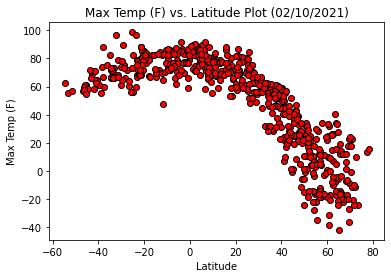

In [9]:
scatter_only(clean_cities_df['Latitude'], clean_cities_df['Max Temp (F)'])

#### This Latitude vs Temperature plot indicates that as we move away from the equator towards the northern hemisphere temperatures start to get colder.

## Latitude vs. Humidity Plot

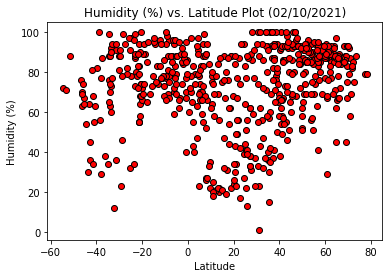

In [10]:
scatter_only(clean_cities_df['Latitude'], clean_cities_df['Humidity (%)'])

#### This Latitude vs Humidity plot indicates that a large group of places regardless of location are going to experience a humidity level over 60%.

## Latitude vs. Cloudiness Plot

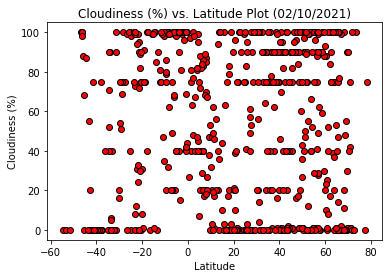

In [11]:
scatter_only(clean_cities_df['Latitude'], clean_cities_df['Cloudiness (%)'])

#### This Latitude vs Cloudiness plot indicates that eventhough there is an evenly distributed data, you can find a considerable group of locations that are going to experience either 0% or 100% cloudiness.

## Latitude vs. Wind Speed Plot

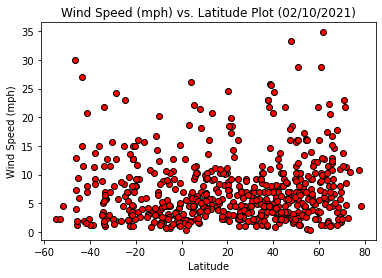

In [12]:
scatter_only(clean_cities_df['Latitude'], clean_cities_df['Wind Speed (mph)'])

#### This plot Latitude vs Wind Speed plot indicates that as you approach the south pole, the wind speed are mostly reduced down to zero.

## Linear Regression

In [13]:
# Create two Data Frames based on Northern and Southern Hemisphere
northern_hemisphere_cities_df = clean_cities_df[(clean_cities_df['Latitude'] >= 0)]
southern_hemisphere_cities_df = clean_cities_df[(clean_cities_df['Latitude'] < 0)]
left_align(southern_hemisphere_cities_df.head())

,City,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
1,Rikitea,-23.120300,-134.969200,78.730000,73,73,9.600000,PF,1612937501
3,Mataura,-46.192700,168.864300,58.230000,70,100,7.310000,NZ,1612937502
4,Bredasdorp,-34.532200,20.040300,66.200000,88,71,3.440000,ZA,1612937502
5,Hobart,-42.879400,147.329400,69.010000,45,20,11.500000,AU,1612937220
6,Conceicao do araguaia,-8.257800,-49.264700,73.060000,96,100,1.630000,BR,1612937502


In [14]:
# Built in function to create scatter plot and linear regression
def scatter_linear(x_axis, y_axis, a, b):
    #First argument is x axis, second is y axis, third one is to determine color and fourth to determine hemisphere.
    
    # Import today's date
    today = dt.datetime.today().strftime('%m/%d/%Y')
    
    # Scatter Plot
    hemisphere = ['Northern Hemisphere ', 'Southern Hemisphere ']
    colors = ['lightblue', 'lightgreen']
    plt.scatter(x_axis, y_axis, marker="o", facecolors=colors[a], edgecolors="black")
    
    #plt.title(f"{hemisphere[b]} ({y_axis.name} vs. {x_axis.name} Linear Regression) ({today})") 
    
    main_title = f"{hemisphere[b]} ({y_axis.name} vs. {x_axis.name} Linear Regression) ({today})"
    image_title = (f"{hemisphere[b]} ({y_axis.name} vs {x_axis.name} Linear Regression)" + '.png')
    plt.title(main_title)
    plt.xlabel(x_axis.name)
    plt.ylabel(y_axis.name)

    # Linear Regression
    x = ((x_axis.mean())-5)
    y = y_axis.min()
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,(x,y),fontsize=15,color="red")
    
    #Save image in same directory
    my_dpi = 144
    
    plt.savefig(f"../output_data/{image_title}", bbox_inches = 'tight')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

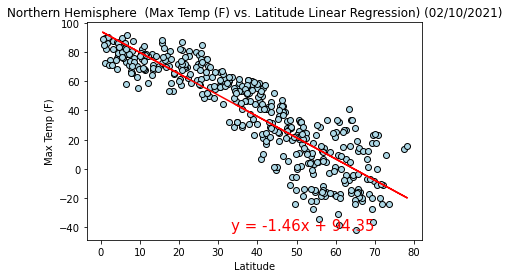

In [15]:
scatter_linear(northern_hemisphere_cities_df['Latitude'], northern_hemisphere_cities_df['Max Temp (F)'], 0, 0)

#### This linear regression is modeling the relationship between Northern Hemisphere Max Temp and Latitude. It shows that as we move North from the Equator temperatures decrease.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

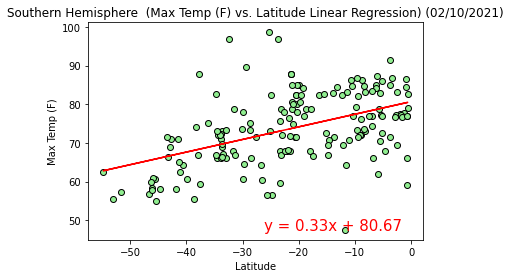

In [16]:
scatter_linear(southern_hemisphere_cities_df['Latitude'], southern_hemisphere_cities_df['Max Temp (F)'], 1, 1)

#### This linear regression is modeling the relationship between Southern Hemisphere Max Temp and Latitude. It shows that temperatures increase as we move closer to the Equator from South Pole.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

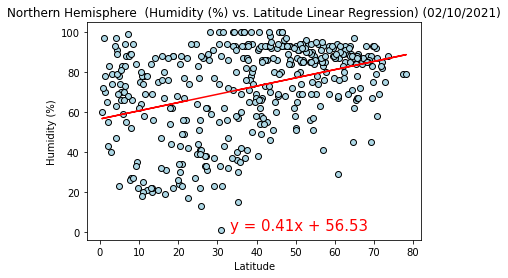

In [17]:
scatter_linear(northern_hemisphere_cities_df['Latitude'], northern_hemisphere_cities_df['Humidity (%)'], 0, 0)

#### This linear regression is modeling the relationship between Northern Hemisphere Humidity level and Latitude. It shows that Humidity levels tends to increase as we move north from the Equator. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

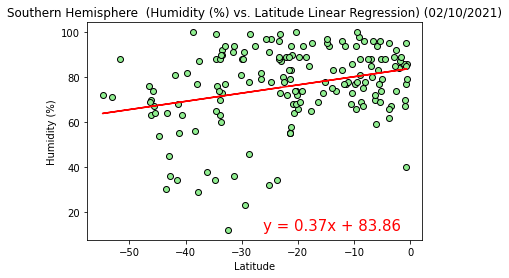

In [18]:
scatter_linear(southern_hemisphere_cities_df['Latitude'], southern_hemisphere_cities_df['Humidity (%)'], 1, 1)

#### This linear regression is modeling the relationship between Southern Hemisphere Humidity level and Latitude. It shows that Humidity levels tends to increase as we approach the Equator from the South Pole.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

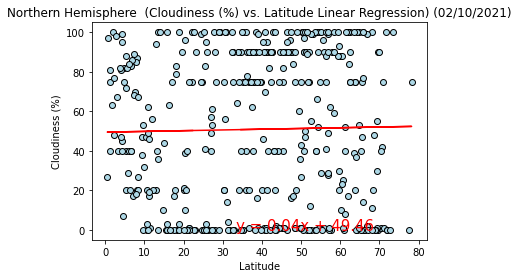

In [19]:
scatter_linear(northern_hemisphere_cities_df['Latitude'], northern_hemisphere_cities_df['Cloudiness (%)'], 0, 0)

#### This linear regression is modeling the relationship between Northern Hemisphere Cloudiness percentage and Latitude. It shows that Cloudiness tends to increase as we move north from the Equator.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

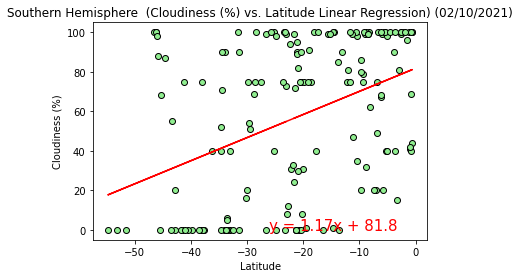

In [20]:
scatter_linear(southern_hemisphere_cities_df['Latitude'], southern_hemisphere_cities_df['Cloudiness (%)'], 1, 1)

#### This linear regression is modeling the relationship between Southern Hemisphere Cloudiness percentage and Latitude. It shows that Cloudiness tends to increase as we approach the equator from the South Pole.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

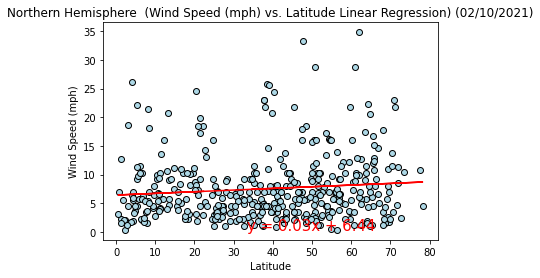

In [21]:
scatter_linear(northern_hemisphere_cities_df['Latitude'], northern_hemisphere_cities_df['Wind Speed (mph)'], 0, 0)

#### This linear regression is modeling the relationship between Northern Hemisphere Wind Speed and Latitude. It shows that Wind Speed tends to experience little to no increase as we move North from the Equator.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

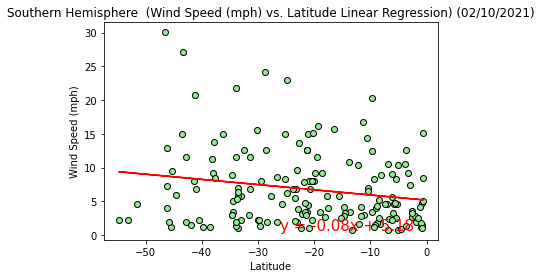

In [22]:
scatter_linear(southern_hemisphere_cities_df['Latitude'], southern_hemisphere_cities_df['Wind Speed (mph)'], 1, 1)

#### This linear regression is modeling the relationship between Southern Hemisphere Wind Speed and Latitude. It shows that Wind Speed tends to decrease as we approach the Equator from the South Pole.